<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/InternshalaML/blob/master/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision tree


An ideal pure node is the one which has entirely homogeneous nodes i.e. 100% of one class and 0 of the other classes.

how do we decide split point?
*   split the nodes on all avail var
*   select the split which results in most homogeneous sub nodes

purity --> homogeneous

Algorithms:


1.   gini impurity = 1 - gini (if we select two items from a population at random, they must be of same class)

      gini value is btw 0 and 1(proab),
      the higher the value = more purity,
      lesser  =  less purity

      lower gini impurity -- higher homogenity of nodes

      works only with categorical targets

      only perform binary splits

      steps:
           *  cal gini impurity for subnodes: 
               gini impurity = 1 -gini
           *  gini= sum of square of proan for each class/category :
               gini = (p1 ^2 + p2 ^2 + ....)
           *  to cal the gini impurity for split , take weighted gini impurity of both sub nodes of that split:
                split a1 = 1 - (()() + ()())
                split a1 = 1 - (()() + ()())
                weighted gini impurity = ((no of elts a1/total in A)(split a1)*(no of elts a2/total in A)(split a2))

  ** the min weighted gini impurity will be split


2.   Chi Square: statistical significance  of differences btw child nodes ans their parent node

  it is measured as sum of squared standardized differences btw actual ans expected freq of target var for each node

  chi sq = sqrt((actual - expected) ^2 / expected)  

  works only with categorical

  can perform two or more splits

  higher the val of chi sq , the higher the homogeneity of nodes

3.   information gain: 
      more impure nodes require more info

      info gain =  1 -  entropy

      entropy = -p1*log2 p1 - p2*log p2 .... -pn log2 pn

      lower entropy means more pure node

      only work with categorical

      less entropy , higher homogenity

      steps:

      cal the entropy of parent

      cal the entropy of each child node

      cal the wt avg entropy of the split

      less wt entropy and higher info gain == best split(more pure node)


      ex:
          play cric = 0.5
          not play = 0.5

          entropy = -(0.5)log2(0.5) -(0.5)log2(0.5) = 1

          play cric = 0
          not play = 1

          entropy = -(0)log2(0) -(1)log2(1) = 0
          

4.  Reduction in variance(continuous var)

  variance = (summation(x - mu)^ 2 )/n
  
  x=sample, mu=mean, n=no of samples

  split with low variance is selected

  step:

  cal the var of each child node

  cal the var of each split as wt avg var of each child node



overfitting = 100 training acc, because of no constraint it splts the data for pure nodes

Performance on val and test data we dont that good performance

so we set a threshold for depth of the tree

if threshold is very small like depth is 1, it leads to unnderfitting

constraints:
  
  1. min samples for a node split

     a. higher values controls overfiftting

     b. too high values can lead to underfitting

  2. min samples for a terminal node

     a. higher values controls overfiftting

     b. too high values can lead to underfitting
     
  3. max depth of tree

     a. higher depth can lead to overfiftting

     b. lower depth can lead to underfitting

  4. max no of terminal nodes





   






# Implementation

In [0]:
#imporitng daataset and lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline



In [0]:
data =pd.read_csv('data_cleaned.csv') 
data.shape

(891, 25)

In [0]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [0]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [0]:
data.dtypes

Survived        int64
Age           float64
Fare          float64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Sex_female      int64
Sex_male        int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
Parch_0         int64
Parch_1         int64
Parch_2         int64
Parch_3         int64
Parch_4         int64
Parch_5         int64
Parch_6         int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [0]:
data.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,0.031425,0.017957,0.020202,0.005612,0.007856,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.486592,13.002015,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,0.174562,0.132871,0.140770,0.074743,0.088337,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
data.describe( include = 'all')

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,0.031425,0.017957,0.020202,0.005612,0.007856,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.486592,13.002015,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,0.174562,0.132871,0.140770,0.074743,0.088337,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#seperating indpendent and dependent var

x = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [0]:
#split
from sklearn.model_selection import train_test_split

In [0]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 101, stratify = y, test_size = 0.25)

In [0]:
 x_train.shape, x_test.shape, y_train.shape, y_test.shape

((668, 24), (223, 24), (668,), (223,))

In [0]:
# distribution in training set

y_train.value_counts(normalize= True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [0]:
# distribution in test set

y_test.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [0]:
# importing decision tree classifier, regressor

from sklearn.tree import  DecisionTreeClassifier as dtc, DecisionTreeRegressor as dtr

In [0]:
#creating the decision tree function

dt_model = dtc(random_state=10)

In [0]:
#fitting the model

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [0]:
#checking the training score
# .score gives the accuracy

dt_model.score(x_train, y_train)

0.9880239520958084

In [0]:
#checking the testing score

dt_model.score(x_test, y_test)

'''
here the accuracy btw trainig anad test is alot
'''

'\nhere the accuracy btw trainig anad test is alot\n'

In [0]:
#predictions on test

dt_model.predict(x_test)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0])

In [0]:
dt_model.predict_proba(x_test)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [0]:
y_pred = dt_model.predict_proba(x_test)[: ,1]

In [0]:
new_y = []
for i in range(len(y_pred)):
  if y_pred[i] < 0.6 :
    new_y.append(0)
  else:
    new_y.append(1)

In [0]:
new_y

[1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0]

In [0]:
from sklearn.metrics import accuracy_score as acs

In [0]:
acs(y_test, new_y)

0.7533632286995515

#### changing the max_depth

In [0]:
train_acc = []
test_acc = []

for i in range(1, 10):
  dt_model = dtc(max_depth=i, random_state=10)
  dt_model.fit(x_train, y_train)
  train_acc.append(dt_model.score(x_train,y_train))
  test_acc.append(dt_model.score(x_test,y_test))


In [0]:
temp = pd.DataFrame({'max_depth': range(1, 10), 'train_acc': train_acc, 'test_acc': test_acc})
temp.shape

(9, 3)

In [0]:
temp.head(10)

,max_depth,train_acc,test_acc
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300
5,6,0.863772,0.775785
6,7,0.889222,0.780269
7,8,0.911677,0.784753
8,9,0.931138,0.775785


No handles with labels found to put in legend.


'\nmax depth  8 give better results\n'

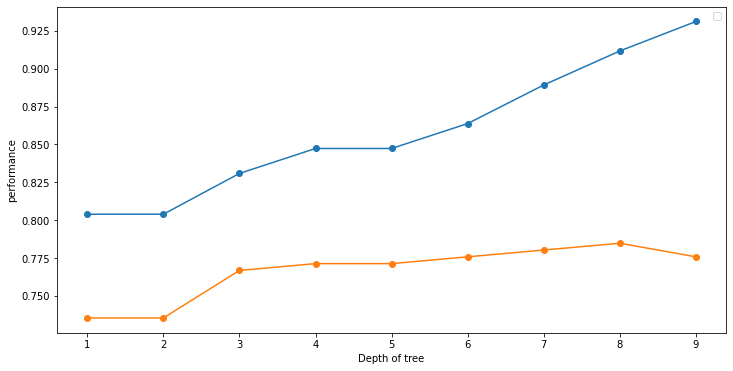

In [0]:
#plot

plt.figure(figsize = (12,6))
plt.plot(temp['max_depth'], temp['train_acc'], marker = 'o')
plt.plot(temp['max_depth'], temp['test_acc'], marker = 'o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

'''
max depth  8 give better results
'''

In [0]:
'''
similar as above we need to find the optimum

max_leaf_nodes
min_samples_split
min_samples_leaf

'''
# checking wrt to depth adn leaf nodes

train_acc = []
test_acc = []

for i in range(10, 50):
  dt_model = dtc(max_depth=8,max_leaf_nodes=i,random_state=10)
  dt_model.fit(x_train, y_train)
  train_acc.append(dt_model.score(x_train,y_train))
  test_acc.append(dt_model.score(x_test,y_test))

In [0]:
temp1 = pd.DataFrame({'max_leaf_nodes': range(10, 50), 'train_acc': train_acc, 'test_acc': test_acc})
temp1.shape

(40, 3)

In [0]:
temp1.head(40)


,max_leaf_nodes,train_acc,test_acc
0,10,0.841317,0.766816
1,11,0.847305,0.775785
2,12,0.850299,0.780269
3,13,0.851796,0.789238
4,14,0.853293,0.789238
5,15,0.853293,0.789238
6,16,0.859281,0.793722
7,17,0.859281,0.793722
8,18,0.859281,0.793722
9,19,0.860778,0.798206


No handles with labels found to put in legend.


'\nmax no of leaf nodes = 40 have good test score\n'

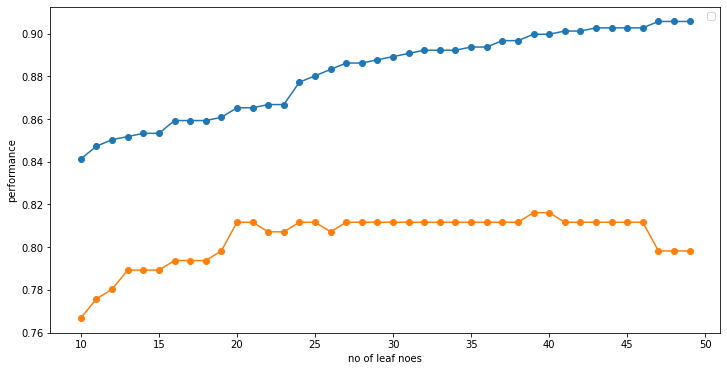

In [0]:
#plot

plt.figure(figsize = (12,6))
plt.plot(temp1['max_leaf_nodes'], temp1['train_acc'], marker = 'o')
plt.plot(temp1['max_leaf_nodes'], temp1['test_acc'], marker = 'o')
plt.xlabel('no of leaf noes')
plt.ylabel('performance')
plt.legend()

'''
max no of leaf nodes = 40 have good test score
'''

In [0]:
# checking wrt to max_depth(8) and max leaf nodes(40), min samples leaf

train_acc = []
test_acc = []

for i in range(10, 50):
  dt_model = dtc(max_depth=8,max_leaf_nodes=40, min_samples_leaf = i,random_state=10)
  dt_model.fit(x_train, y_train)
  train_acc.append(dt_model.score(x_train,y_train))
  test_acc.append(dt_model.score(x_test,y_test))

In [0]:
temp2 = pd.DataFrame({'min_samples_leaf': range(10, 50), 'train_acc': train_acc, 'test_acc': test_acc})
temp2.shape

(40, 3)

In [0]:
temp2.head(40)

,min_samples_leaf,train_acc,test_acc
0,10,0.847305,0.771300
1,11,0.848802,0.789238
2,12,0.847305,0.771300
3,13,0.844311,0.766816
4,14,0.844311,0.766816
5,15,0.842814,0.784753
6,16,0.842814,0.784753
7,17,0.842814,0.784753
8,18,0.841317,0.775785
9,19,0.832335,0.775785


No handles with labels found to put in legend.


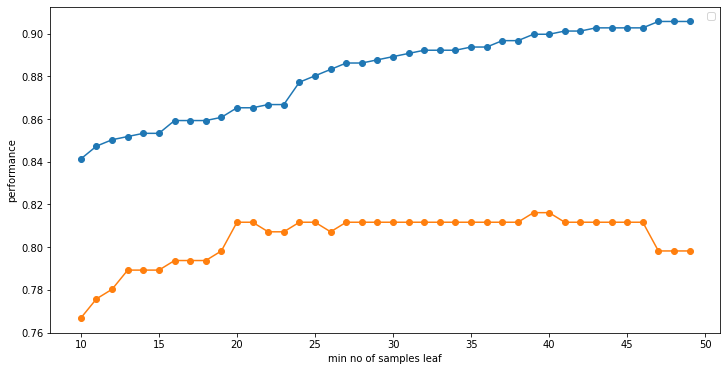

In [0]:
#plot

plt.figure(figsize = (12,6))
plt.plot(temp2['min_samples_leaf'], temp1['train_acc'], marker = 'o')
plt.plot(temp2['min_samples_leaf'], temp1['test_acc'], marker = 'o')
plt.xlabel('min no of samples leaf')
plt.ylabel('performance')
plt.legend()

In [0]:
#fitting the model

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=40,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=49, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [0]:
dt_model.score(x_train, y_train)

0.8248502994011976

In [0]:
dt_model.score(x_test, y_test)

0.7713004484304933

### plotting a decision tree

In [0]:
from sklearn import tree

In [0]:
!pip install graphviz

In [0]:
dt = tree.export_graphviz(dt_model, out_file = 'tree.dot', feature_names=x_train.columns, max_depth = 5, filled =True)

'''
we have the dots, filled used for color
'''

'\nwe have the dots, filled used for color\n'

In [0]:
!dot -Tpng tree.dot -o tree.png

'''
conerting those dot to tree and saving the current directory
'''


'\nconerting those dot to tree and saving the current directory\n'

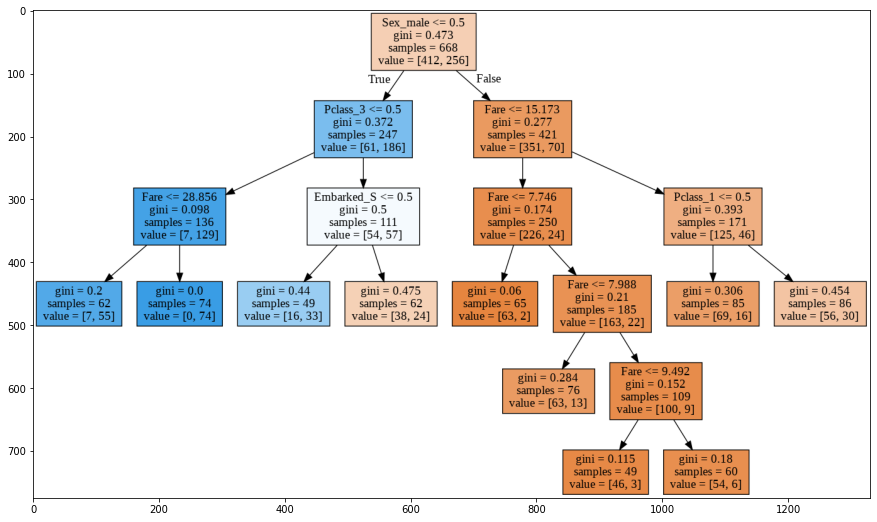

In [0]:
# reading the saved image

image = plt.imread('tree.png')
plt.figure(figsize = (15, 15))
plt.imshow(image)

applications of decision tree

1. fraud detedtion
2. credit risk
3. loan default
4. predicting sales of a retail oulet 
5. no oof bikes rented
6. employee altrition
7.cusotmer 